In [1]:
# Packages for EDA 
import matplotlib.pyplot as plt
import seaborn as sns 
import pandas as pd 
import numpy as np 

# Data Preprocessing
from sklearn.model_selection import train_test_split # 홀드아웃
from sklearn.preprocessing import PowerTransformer
from datasist.structdata import detect_outliers
from sklearn.metrics import mean_squared_error
from imblearn.over_sampling import SMOTE
from sklearn.impute import SimpleImputer # 보관
import category_encoders as ce 
import re # 정규표현시 ( 문자를 기호로 - 문자패턴 )

# Packages options 
sns.set(rc={'figure.figsize': [14, 7]}, font_scale=1.2) # Standard figure size for all 
np.seterr(divide='ignore', invalid='ignore', over='ignore')

{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

In [4]:
df = pd.read_csv('./csv/Preprocessed_final_Data.csv', index_col=0)
df.head(3)

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,...,Occupation_Musician,Occupation_Scientist,Occupation_Teacher,Occupation_Writer,Payment_of_Min_Amount_Yes,Payment_Behaviour_High_spent_Medium_value_payments,Payment_Behaviour_High_spent_Small_value_payments,Payment_Behaviour_Low_spent_Large_value_payments,Payment_Behaviour_Low_spent_Medium_value_payments,Payment_Behaviour_Low_spent_Small_value_payments
0,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,7.0,11.27,...,0,1,0,0,0,0,1,0,0,0
1,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,-1.0,7.0,11.27,...,0,1,0,0,0,0,0,1,0,0
2,33.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,7.0,6.27,...,0,1,0,0,0,0,0,0,1,0


경향분석을 위해 데이터 10만개 중 만개만 사용

In [5]:
# df = df.sample(n=10000, random_state=100)
# df.reset_index(inplace=False)
# df

In [6]:
X = df.drop('Delay_from_due_date', axis=1)
y = df['Delay_from_due_date']
# X

In [7]:
Loan_list = ['Credit-Builder Loan', 'Personal Loan', 'Debt Consolidation Loan', 'Student Loan', 'Payday Loan', 'Mortgage Loan', 'Auto Loan', 'Home Equity Loan']
Month_list=['Month_August','Month_February','Month_January','Month_July','Month_June','Month_March','Month_May']
PB_list = ['Payment_Behaviour_High_spent_Medium_value_payments', 'Payment_Behaviour_High_spent_Small_value_payments', 'Payment_Behaviour_Low_spent_Large_value_payments', 'Payment_Behaviour_Low_spent_Medium_value_payments', 'Payment_Behaviour_Low_spent_Small_value_payments']
OC_list = ['Occupation_Architect', 'Occupation_Developer', 'Occupation_Doctor', 'Occupation_Engineer', 'Occupation_Entrepreneur', 'Occupation_Journalist', 'Occupation_Lawyer', 'Occupation_Manager', 'Occupation_Mechanic', 'Occupation_Media_Manager', 'Occupation_Musician', 'Occupation_Scientist', 'Occupation_Teacher', 'Occupation_Writer']

df = df.drop(OC_list, axis=1)
df = df.drop(PB_list, axis=1)
df = df.drop(Loan_list, axis=1)
df = df.drop(Month_list, axis=1)

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,100000.0,33.311110,10.618880,14.000000,25.000000,33.000000,41.000000,56.000000
Annual_Income,100000.0,48046.898523,34706.155065,7005.930000,19457.500000,37578.610000,68655.405000,152574.760000
Monthly_Inhand_Salary,100000.0,3983.576117,2875.553530,303.645417,1626.594167,3096.836667,5712.553333,12461.296667
Num_Bank_Accounts,100000.0,5.413080,2.508894,1.000000,3.000000,5.000000,7.000000,18.000000
Num_Credit_Card,100000.0,5.534440,2.068496,1.000000,4.000000,5.000000,7.000000,18.000000
Interest_Rate,100000.0,14.531440,8.739453,1.000000,7.000000,13.000000,20.000000,34.000000
Num_of_Loan,100000.0,-0.507070,20.191464,-100.000000,1.000000,3.000000,5.000000,9.000000
Delay_from_due_date,100000.0,19.415900,12.638937,-5.000000,10.000000,18.000000,26.000000,55.000000
Num_of_Delayed_Payment,100000.0,13.320820,6.289298,-3.000000,9.000000,14.000000,18.000000,28.000000
Changed_Credit_Limit,100000.0,10.241045,6.575751,-6.490000,5.320000,9.400000,14.600000,29.160000


In [9]:
df

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Credit_Score,Payment_of_Min_Amount_Yes
0,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,7.0,11.27,4.0,2.0,809.98,26.822620,265.0,49.574949,80.415295,312.494089,2,0
1,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,-1.0,7.0,11.27,4.0,2.0,809.98,31.944960,265.0,49.574949,118.280222,284.629162,2,0
2,33.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,7.0,6.27,4.0,2.0,809.98,28.609352,267.0,49.574949,81.699521,331.209863,2,0
3,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,5.0,4.0,6.27,4.0,2.0,809.98,31.377862,268.0,49.574949,199.458074,223.451310,2,0
4,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,6.0,7.0,11.27,4.0,2.0,809.98,24.797347,269.0,49.574949,41.420153,341.489231,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,25.0,39628.99,3359.415833,4.0,6.0,7.0,2.0,23.0,7.0,11.50,3.0,2.0,502.38,34.663572,378.0,35.104023,60.971333,332.021453,0,0
99996,25.0,39628.99,3359.415833,4.0,6.0,7.0,2.0,18.0,7.0,11.50,3.0,2.0,502.38,40.565631,379.0,35.104023,54.185950,332.021453,0,0
99997,25.0,39628.99,3359.415833,4.0,6.0,7.0,2.0,27.0,6.0,11.50,3.0,2.0,502.38,41.255522,380.0,35.104023,24.028477,332.021453,0,0
99998,25.0,39628.99,3359.415833,4.0,6.0,7.0,2.0,20.0,6.0,11.50,3.0,2.0,502.38,33.638208,381.0,35.104023,251.672582,332.021453,1,0


In [10]:
# X = df[['Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Score', 'Payment_of_Min_Amount_Yes', 'Credit-Builder Loan', 'Personal Loan', 'Debt Consolidation Loan', 'Student Loan', 'Payday Loan', 'Mortgage Loan', 'Auto Loan', 'Home Equity Loan']]
# 신용카드수, 신용카드이자율, 대출수, 대출유형, 평균 연체일, 체불횟수, 신용카드 한도 변경율, 신용조회수, 신용점수, 최소금 지불여부, 체불액

# 고객경향 : 우리가 선택한 컬럼
# customer_trend_metic= ['Age', 'Annual_Income', 'Outstanding_Debt', 'Interest_Rate']

# 고객경향 : 신용평가 정보 base
credit_score_metric  = ['Credit_History_Age', 'Num_Bank_Accounts', 'Outstanding_Debt', 'Num_of_Delayed_Payment']

X = df[credit_score_metric]
X.reset_index(inplace=False)
X.describe().T

,count,mean,std,min,25%,50%,75%,max
Credit_History_Age,100000.0,220.911270,99.682053,1.00,144.0000,219.0000,302.00,404.00
Num_Bank_Accounts,100000.0,5.413080,2.508894,1.00,3.0000,5.0000,7.00,18.00
Outstanding_Debt,100000.0,1249.626768,894.065229,0.23,566.0725,1166.1175,1602.94,4014.35
Num_of_Delayed_Payment,100000.0,13.320820,6.289298,-3.00,9.0000,14.0000,18.00,28.00


In [11]:
y.describe()

count    100000.000000
mean         19.415900
std          12.638937
min          -5.000000
25%          10.000000
50%          18.000000
75%          26.000000
max          55.000000
Name: Delay_from_due_date, dtype: float64

In [12]:
for i in range(len(y)):
    if y[i] <= 0 :
        y[i] = 0
    elif y[i] <= 5:
        y[i] = 1
    elif y[i] <= 30:
        y[i] = 2
    elif y[i] <= 90:
        y[i] = 3
    else:
        pass
    
y = y.astype("int")
y.value_counts()

In [14]:
# from imblearn.over_sampling import SMOTE
# rus = SMOTE(sampling_strategy='auto')
# X_data_rus, y_data_rus = rus.fit_resample(X, y)

# 언더샘플링
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=156)
X_data_rus, y_data_rus = rus.fit_resample(X, y)

In [15]:
y_data_rus.value_counts(normalize=True)

0    0.25
1    0.25
2    0.25
3    0.25
Name: Delay_from_due_date, dtype: float64

In [16]:
y_data_rus.value_counts()

0    1786
1    1786
2    1786
3    1786
Name: Delay_from_due_date, dtype: int64

In [17]:
# df = df.sample(n=10000, random_state=100)
# df.reset_index(inplace=False)
# df

In [18]:
# # 정규화
# scalar = PowerTransformer(method='yeo-johnson', standardize=True).fit(df)
# X_data_rus = scalar.transform(X_data_rus)

In [25]:
# 정규화
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
clustering_sc = sc.fit_transform(X_data_rus)

In [17]:
X_data_rus["Delay_from_due_date"] = y_data_rus
df = X_data_rus

In [18]:
credit_score_metric

['Credit_History_Age',
 'Num_Bank_Accounts',
 'Outstanding_Debt',
 'Num_of_Delayed_Payment']

In [19]:
df_dataframe = pd.DataFrame(df)
df_dataframe.columns = ['Credit_History_Age', 'Num_Bank_Accounts', 'Outstanding_Debt', 'Num_of_Delayed_Payment', 'cluster']
# df_dataframe.columns = ['Age', 'Annual_Income', 'Oustanding_Debt', 'Interest_Rate', 'Delay_from_due_date']
df_dataframe

,Credit_History_Age,Num_Bank_Accounts,Outstanding_Debt,Num_of_Delayed_Payment,cluster
0,265.0,3.0,809.98,7.0,0
1,207.0,2.0,632.46,6.0,0
2,367.0,1.0,352.16,3.0,0
3,368.0,1.0,352.16,2.0,0
4,369.0,1.0,352.16,3.0,0
...,...,...,...,...,...
7139,232.0,9.0,2520.04,6.0,3
7140,15.0,6.0,3127.61,20.0,3
7141,240.0,10.0,2580.19,18.0,3
7142,128.0,10.0,3114.29,21.0,3


In [20]:
# 그룹 특징파악
df_dataframe.groupby('cluster').count()

,Credit_History_Age,Num_Bank_Accounts,Outstanding_Debt,Num_of_Delayed_Payment
cluster,,,,
0,1786,1786,1786,1786
1,1786,1786,1786,1786
2,1786,1786,1786,1786
3,1786,1786,1786,1786


In [21]:
df_dataframe.groupby('cluster').mean()

,Credit_History_Age,Num_Bank_Accounts,Outstanding_Debt,Num_of_Delayed_Payment
cluster,,,,
0,288.258679,2.642217,704.076265,6.276036
1,280.295633,3.325308,766.444546,7.912654
2,232.973124,5.320269,1178.422371,13.063830
3,126.715566,7.886338,2136.339597,18.797872


# 클러스터링(안씀)

In [26]:
# 클러스터링 결과 가시화
from sklearn.decomposition import PCA
X1 = clustering_sc
pca = PCA(n_components=2, random_state=3)
pca.fit(X1)
x_pca = pca.transform(X1)
pca_df = pd.DataFrame(x_pca)
pca_df['cluster'] = df_dataframe['cluster']

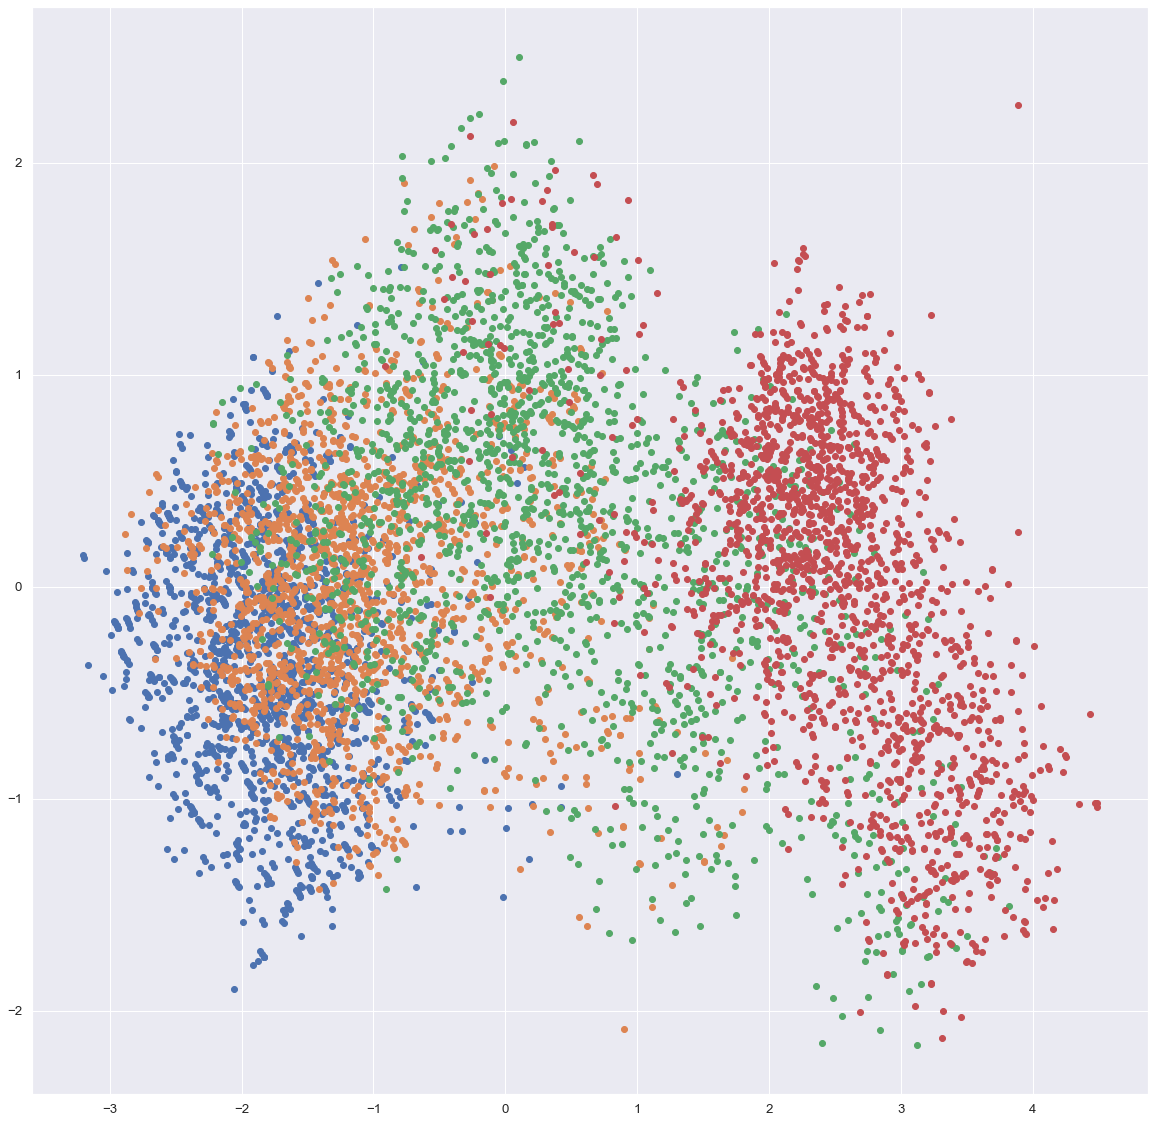

In [27]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(20,20))
for i in df_dataframe['cluster'].unique():
    tmp = pca_df.loc[pca_df['cluster']==i]
    plt.scatter(tmp[0], tmp[1])

In [28]:
d_array = df_dataframe.to_numpy()

In [29]:
from sklearn.metrics import silhouette_samples, silhouette_score

feature_name = df_dataframe.columns

score_samples = silhouette_samples(d_array, df_dataframe['cluster'])
print('silhouette_samples() return 값의 shape', score_samples.shape)

silhouette_samples() return 값의 shape (7144,)


In [30]:
df_dataframe['silhouette_coeff'] = score_samples

In [31]:
average_score = silhouette_score(d_array, df_dataframe['cluster'])
print('Silhouette Analysis Score : {0:3f}'.format(average_score))

df_dataframe.head(15)

Silhouette Analysis Score : -0.057030


,Credit_History_Age,Num_Bank_Accounts,Outstanding_Debt,Num_of_Delayed_Payment,cluster,silhouette_coeff
0,265.0,3.0,809.98,7.0,0,0.026939
1,207.0,2.0,632.46,6.0,0,0.053807
2,367.0,1.0,352.16,3.0,0,0.092652
3,368.0,1.0,352.16,2.0,0,0.092633
4,369.0,1.0,352.16,3.0,0,0.092599
5,370.0,1.0,352.16,2.0,0,0.092575
6,371.0,1.0,352.16,4.0,0,0.092528
7,372.0,1.0,352.16,3.0,0,0.092503
8,373.0,1.0,352.16,2.0,0,0.092472
9,374.0,1.0,352.16,2.0,0,0.092432


In [32]:
df_dataframe.groupby('cluster')['silhouette_coeff'].mean()

cluster
0    0.038324
1   -0.050829
2   -0.303050
3    0.087433
Name: silhouette_coeff, dtype: float64

In [33]:
df_dataframe['silhouette_coeff']

0       0.026939
1       0.053807
2       0.092652
3       0.092633
4       0.092599
          ...   
7139    0.411707
7140    0.418185
7141    0.416488
7142    0.419582
7143   -0.325392
Name: silhouette_coeff, Length: 7144, dtype: float64

<AxesSubplot: >

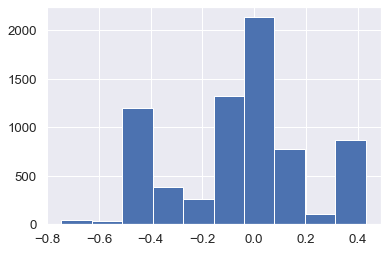

In [34]:
df_dataframe['silhouette_coeff'].hist()

In [34]:
import math
import matplotlib.cm as cm
import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score


def visualize_silhouette(cluster_lists, X_features):     
    # 입력값으로 클러스터링 갯수들을 리스트로 받아서, 각 갯수별로 클러스터링을 적용하고 실루엣 개수를 구함
    n_cols = len(cluster_lists)
    
    # plt.subplots()으로 리스트에 기재된 클러스터링 수만큼의 sub figures를 가지는 axs 생성 
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)
    
    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 실루엣 개수 시각화
    for ind, n_cluster in enumerate(cluster_lists):
        
        # KMeans 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산. 
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(X_features)
        
        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)
        
        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
        
        # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현. 
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()
            
            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i
            
            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10
            
        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")
        

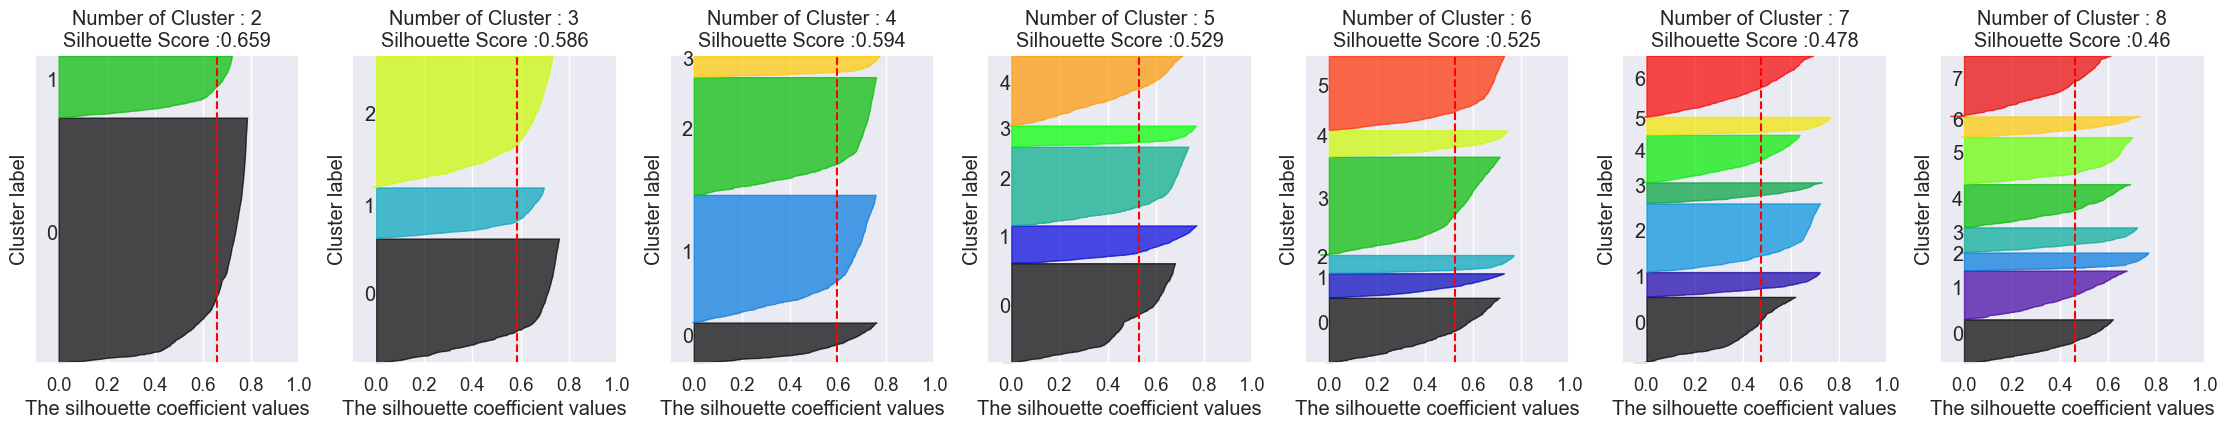

In [35]:
visualize_silhouette([2, 3, 4, 5, 6, 7, 8], d_array)

In [36]:
df_dataframe.describe()

,Credit_History_Age,Num_Bank_Accounts,Outstanding_Debt,Num_of_Delayed_Payment,cluster,silhouette_coeff
count,7144.000000,7144.000000,7144.000000,7144.000000,7144.000000,7144.000000
mean,232.060750,4.793533,1196.320695,11.512598,1.500000,-0.057030
std,100.165828,2.774871,909.422702,6.979028,1.118112,0.253435
min,2.000000,1.000000,0.230000,-3.000000,0.000000,-0.745040
25%,160.000000,2.000000,497.595000,6.000000,0.750000,-0.224058
50%,234.000000,5.000000,1097.170000,11.000000,1.500000,-0.027426
75%,314.000000,7.000000,1473.170000,17.000000,2.250000,0.076164
max,404.000000,18.000000,4014.350000,28.000000,3.000000,0.431445


In [37]:
df_dataframe.groupby('cluster')['silhouette_coeff'].std()
# 굉장히 낮아서 좋다~

cluster
0    0.057967
1    0.081682
2    0.158405
3    0.362386
Name: silhouette_coeff, dtype: float64

In [38]:
df_dataframe

,Credit_History_Age,Num_Bank_Accounts,Outstanding_Debt,Num_of_Delayed_Payment,cluster,silhouette_coeff
0,265.0,3.0,809.98,7.0,0,0.026939
1,207.0,2.0,632.46,6.0,0,0.053807
2,367.0,1.0,352.16,3.0,0,0.092652
3,368.0,1.0,352.16,2.0,0,0.092633
4,369.0,1.0,352.16,3.0,0,0.092599
...,...,...,...,...,...,...
7139,232.0,9.0,2520.04,6.0,3,0.411707
7140,15.0,6.0,3127.61,20.0,3,0.418185
7141,240.0,10.0,2580.19,18.0,3,0.416488
7142,128.0,10.0,3114.29,21.0,3,0.419582


In [39]:
# df_dataframe.groupby(['cluster', 'Delay_from_due_date'], as_index=False).count()[['cluster', 'Delay_from_due_date', 'Credit_History_Age', 'Num_Bank_Accounts', 'Outstanding_Debt', 'Num_of_Delayed_Payment']]
df_dataframe.groupby(['cluster'], as_index=False).count()[['cluster','Credit_History_Age']]

,cluster,Credit_History_Age
0,0,1786
1,1,1786
2,2,1786
3,3,1786


In [40]:
df_dataframe.groupby(['cluster', 'Delay_from_due_date'], as_index=False).mean()[['cluster', 'Delay_from_due_date', 'Credit_History_Age', 'Num_Bank_Accounts', 'Outstanding_Debt', 'Num_of_Delayed_Payment']]

KeyError: 'Delay_from_due_date'

In [ ]:
df_dataframe.describe().T

,count,mean,std,min,25%,50%,75%,max
Credit_History_Age,7144.0,232.060750,100.165828,2.000000,160.00000,234.000000,314.000000,404.000000
Num_Bank_Accounts,7144.0,4.793533,2.774871,1.000000,2.00000,5.000000,7.000000,18.000000
Outstanding_Debt,7144.0,1196.320695,909.422702,0.230000,497.59500,1097.170000,1473.170000,4014.350000
Num_of_Delayed_Payment,7144.0,11.512598,6.979028,-3.000000,6.00000,11.000000,17.000000,28.000000
Delay_from_due_date,7144.0,1.500000,1.118112,0.000000,0.75000,1.500000,2.250000,3.000000
cluster,7144.0,1.993281,1.723733,0.000000,0.00000,2.000000,4.000000,5.000000
silhouette_coeff,7144.0,0.525231,0.188325,-0.024753,0.42951,0.583707,0.673146,0.768493


In [ ]:
df_dataframe.groupby('cluster').describe().T

cluster                                 0            1            2  \
Credit_History_Age     count  2278.000000   609.000000  1771.000000   
                       mean    227.596576   132.579639   285.031621   
                       std     102.793430    60.062089    67.301414   
                       min       2.000000     3.000000    66.000000   
                       25%     151.000000    82.000000   233.000000   
                       50%     229.000000   132.000000   283.000000   
                       75%     315.000000   180.000000   344.000000   
                       max     404.000000   245.000000   402.000000   
Num_Bank_Accounts      count  2278.000000   609.000000  1771.000000   
                       mean      4.886743     7.535304     3.338792   
                       std       2.791604     1.748821     1.933459   
                       min       1.000000     2.000000     1.000000   
                       25%       3.000000     6.000000     1.000000   
                       50%       5.000000     8.000000     3.000000   
                       75%       7.000000     9.000000     5.000000   
                       max      18.000000    10.000000     8.000000   
Outstanding_Debt       count  2278.000000   609.000000  1771.000000   
                       mean   1259.358676  2592.299984   243.764523   
                       std     144.861782   204.728790   142.767783   
                       min     993.710000  2256.440000     0.230000   
                       25%    1166.155000  2425.130000   115.220000   
                       50%    1243.285000  2575.230000   244.270000   
                       75%    1379.140000  2694.550000   364.450000   
                       max    1590.870000  3061.730000   489.940000   
Num_of_Delayed_Payment count  2278.000000   609.000000  1771.000000   
                       mean     11.681738    18.175698     8.029927   
                       std       7.112443     4.565352     5.183929   
                       min      -3.000000     5.000000    -3.000000   
                       25%       6.000000    15.000000     4.000000   
                       50%      11.000000    18.000000     8.000000   
                       75%      17.000000    22.000000    12.000000   
                       max      28.000000    28.000000    23.000000   
Delay_from_due_date    count  2278.000000   609.000000  1771.000000   
                       mean      1.528534     2.663383     0.867871   
                       std       1.123402     0.573530     0.814100   
                       min       0.000000     0.000000     0.000000   
                       25%       1.000000     2.000000     0.000000   
                       50%       2.000000     3.000000     1.000000   
                       75%       3.000000     3.000000     1.000000   
                       max       3.000000     3.000000     3.000000   
silhouette_coeff       count  2278.000000   609.000000  1771.000000   
                       mean      0.503497     0.550963     0.573386   
                       std       0.173941     0.198293     0.179054   
                       min      -0.024753     0.005364     0.005995   
                       25%       0.449074     0.425831     0.524314   
                       50%       0.551119     0.638134     0.655175   
                       75%       0.627901     0.714506     0.691688   
                       max       0.708179     0.739751     0.727303   

cluster                                 3            4            5  
Credit_History_Age     count   417.000000  1507.000000   562.000000  
                       mean     87.851319   284.568679   157.234875  
                       std      51.286075    71.753181    52.284751  
                       min       2.000000    66.000000    63.000000  
                       25%      38.000000   227.000000   113.000000  
                       50%      89.000000   284.000000   157.000000  
                       75%    

---
# 경향분석(trend analysis)